<a href="https://colab.research.google.com/github/challajaipalreddy/Churn_prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Telco Customer Churn Dataset**

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Setup
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)


In [ ]:
# Load dataset
df = pd.read_csv("/content/churn prediction.csv")
print(f"Shape of dataset: {df.shape}")
df.head()


Shape of dataset: (300, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,No,No,No,No,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No,No,No,Yes,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,No,No,No,No,No,One year,No,Bank transfer,19.63,412.23,Yes


**Full data
**

In [ ]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,No,No,No,No,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No,No,No,Yes,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,No,No,No,No,No,One year,No,Bank transfer,19.63,412.23,Yes
5,0006-XXXX,Female,0,Yes,No,70,Yes,No,No,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,43.21,3024.70,No
6,0007-XXXX,Male,1,Yes,No,1,No,No,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Credit card,39.80,39.80,Yes
7,0008-XXXX,Male,1,No,Yes,5,No,Yes,No,No,No,No,Yes,No,No,Month-to-month,No,Credit card,45.47,227.35,No
8,0009-XXXX,Male,1,No,Yes,12,No,Yes,DSL,No,No,No,No,No,No,Two year,Yes,Bank transfer,43.13,517.56,No
9,0010-XXXX,Female,1,No,No,46,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,24.53,1128.38,Yes


**Data Cleaning**

In [ ]:
# Info on data types and missing values
df.info()

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            300 non-null    object 
 1   SeniorCitizen     300 non-null    int64  
 2   Partner           300 non-null    object 
 3   Dependents        300 non-null    object 
 4   tenure            300 non-null    int64  
 5   PhoneService      300 non-null    object 
 6   MultipleLines     300 non-null    object 
 7   InternetService   300 non-null    object 
 8   OnlineSecurity    300 non-null    object 
 9   OnlineBackup      300 non-null    object 
 10  DeviceProtection  300 non-null    object 
 11  TechSupport       300 non-null    object 
 12  StreamingTV       300 non-null    object 
 13  StreamingMovies   300 non-null    object 
 14  Contract          300 non-null    object 
 15  PaperlessBilling  300 non-null    object 
 16  PaymentMethod     300 non-null    object 
 1

<ipython-input-8-8f75b4863a8f>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            300 non-null    object 
 1   SeniorCitizen     300 non-null    int64  
 2   Partner           300 non-null    object 
 3   Dependents        300 non-null    object 
 4   tenure            300 non-null    int64  
 5   PhoneService      300 non-null    object 
 6   MultipleLines     300 non-null    object 
 7   InternetService   300 non-null    object 
 8   OnlineSecurity    300 non-null    object 
 9   OnlineBackup      300 non-null    object 
 10  DeviceProtection  300 non-null    object 
 11  TechSupport       300 non-null    object 
 12  StreamingTV       300 non-null    object 
 13  StreamingMovies   300 non-null    object 
 14  Contract          300 non-null    object 
 15  PaperlessBilling  300 non-null    object 
 16  PaymentMethod     300 non-null    object 
 1

**EDA(Exploratory Data analysis)**

<ipython-input-10-19adc67c9481>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


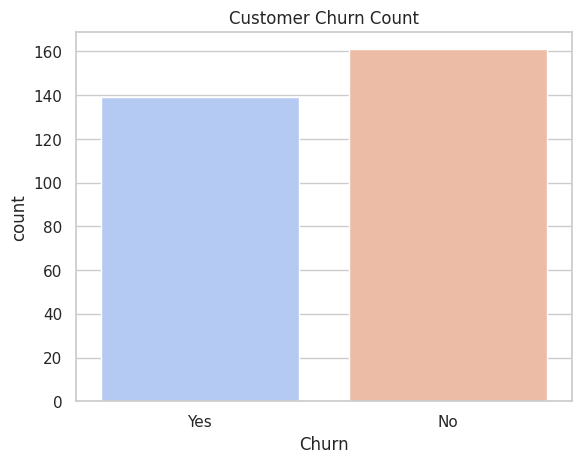

In [ ]:
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Customer Churn Count')
plt.show()


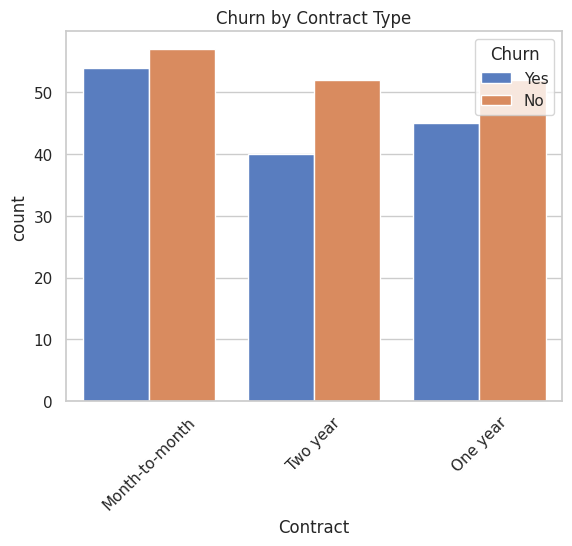

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df, palette='muted')
plt.xticks(rotation=45)
plt.title('Churn by Contract Type')
plt.show()


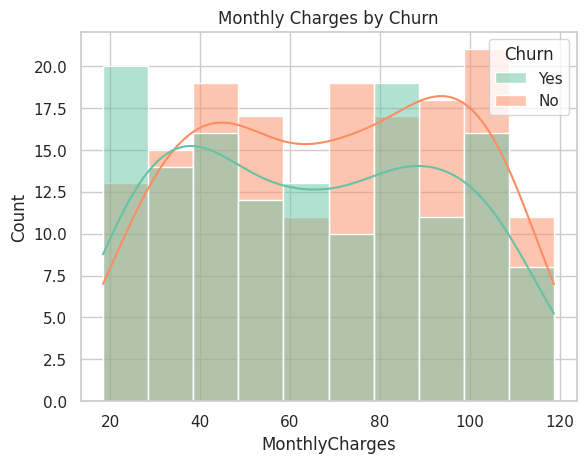

In [ ]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, palette='Set2')
plt.title("Monthly Charges by Churn")
plt.show()


<ipython-input-13-e6549e0a0af3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette='Set3')


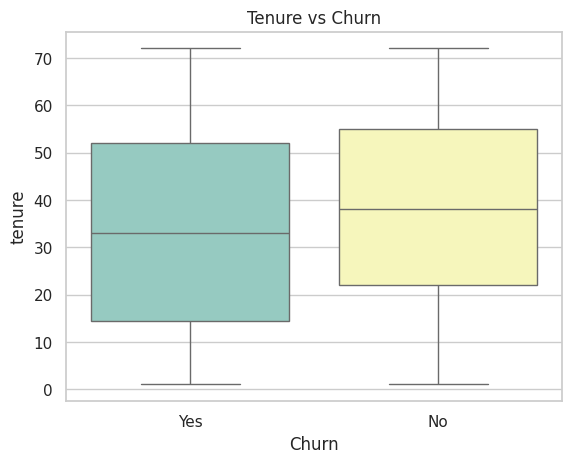

In [ ]:
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set3')
plt.title("Tenure vs Churn")
plt.show()


**Data Preprocessing
Convert Categorical Variables**

In [ ]:
# Label encode binary variables (Yes/No)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-hot encode other categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,5,0,1,27.43,137.15,1,True,True,False,True,False,True,False,False,False,False,False,False,True,False,False
1,0,0,0,42,1,0,38.28,1607.76,1,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False
2,0,0,0,61,1,0,106.44,6492.84,1,True,False,False,True,False,True,False,True,True,False,True,False,False,False,False
3,1,0,1,22,1,0,92.49,2034.78,0,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
4,1,1,1,21,0,0,19.63,412.23,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)


Train set: (240, 23)
Test set: (60, 23)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Evaluation**
**Logistic Regression**

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.56      0.59      0.57        34
           1       0.42      0.38      0.40        26

    accuracy                           0.50        60
   macro avg       0.49      0.49      0.49        60
weighted avg       0.50      0.50      0.50        60

Accuracy: 0.5


**Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.51      0.68      0.58        34
           1       0.27      0.15      0.20        26

    accuracy                           0.45        60
   macro avg       0.39      0.42      0.39        60
weighted avg       0.41      0.45      0.41        60

Accuracy: 0.45


**Confusion Matrix**

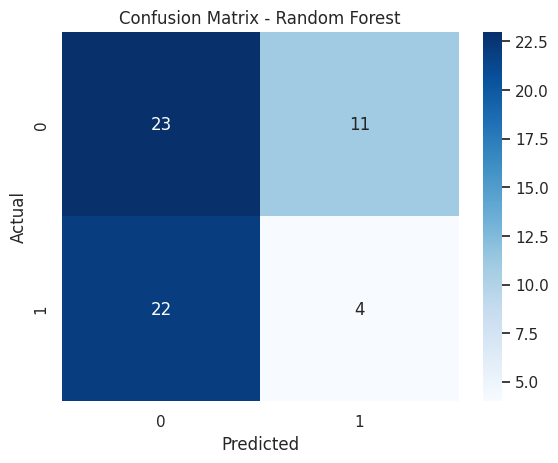

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC Score (Random Forest):", roc_score)


ROC-AUC Score (Random Forest): 0.38291855203619907


In [ ]:
import joblib
joblib.dump(rf_model, 'random_forest_churn.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']